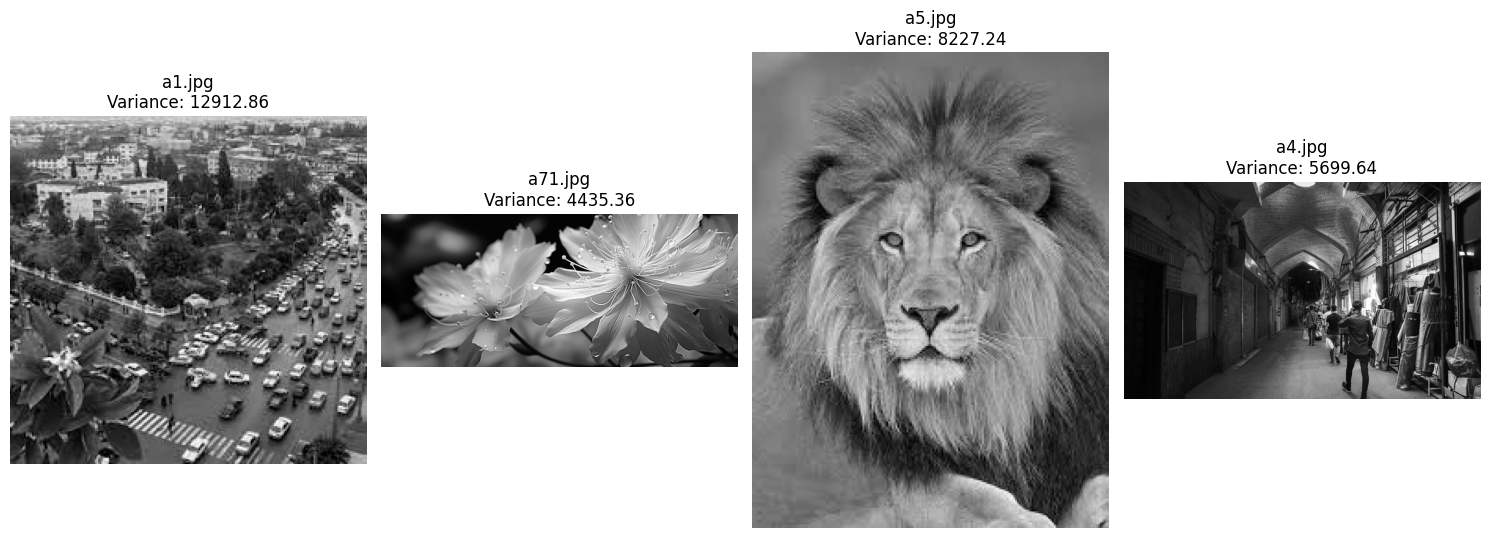

4: Image quality is good. The variance (12912.86) indicates sharp, well-defined edges.
4: Image quality is good. The variance (4435.36) indicates sharp, well-defined edges.
4: Image quality is good. The variance (8227.24) indicates sharp, well-defined edges.
4: Image quality is good. The variance (5699.64) indicates sharp, well-defined edges.


In [3]:
# Provided by Somayeh Komeylian: PhD Student at UCSD & SDSU #
# Computer Vision #
# Calculate the variance of the edge-detected images generated by the Canny algorithm. 

import cv2
import matplotlib.pyplot as plt
import os
import math

# Define the variance function
def varr(x):
    a = cv2.Canny(x, 100, 200).var()
    return a

# List of image file names
image_files = ['a1.jpg', 'a71.jpg', 'a5.jpg', 'a4.jpg']  # Add more image filenames as needed
images = []
variances = []

# Process each image in the list
for filename in image_files:
    img = cv2.imread(filename, 0)
    if img is not None:
        v = varr(img)
        images.append(img)
        variances.append(v)
    else:
        print(f"Warning: Could not read image {filename}. Skipping.")


def qualify_image(image_variance, threshold=1000):
    """
    Qualifies an image based on the variance of its Canny edge detection output.
    A higher variance is indicative of a sharper, more detailed image.
    The threshold is an example value and may need adjustment based on specific use cases.
    """
    if image_variance > threshold:
        return f"Image quality is good. The variance ({image_variance:.2f}) indicates sharp, well-defined edges."
    else:
        return f"Image quality may be poor. The variance ({image_variance:.2f}) is low, suggesting a blurry or low-detail image."
    print("-" * 30)


# Calculate grid dimensions for subplots
num_images = len(images)
cols = 4  # You can adjust the number of columns
rows = math.ceil(num_images / cols)

# Create a figure to display all images
plt.figure(figsize=[15, 10])

# Display each image in a subplot
for i in range(num_images):
    message = qualify_image(v, threshold=100)  # Adjust the threshold as needed

    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"{image_files[i]}\nVariance: {variances[i]:.2f}")
    plt.axis('off')  # Hide axes for cleaner display

plt.tight_layout()  # Adjusts spacing between subplots
plt.show()


# Print the messages for each image
for i in range(num_images):
    v = varr(images[i])
    message = qualify_image(v, threshold=100)
    print(f"{num_images}: {message}")


